In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df.shape

(150, 5)

In [11]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [14]:
fig = px.histogram(data_frame=df, x='species', title='total num of species', color='species')
fig.show()

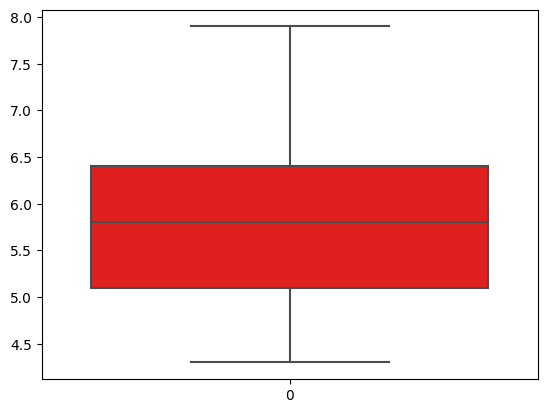

In [15]:
sns.boxplot(df['sepal_length'],color='red')
plt.show()

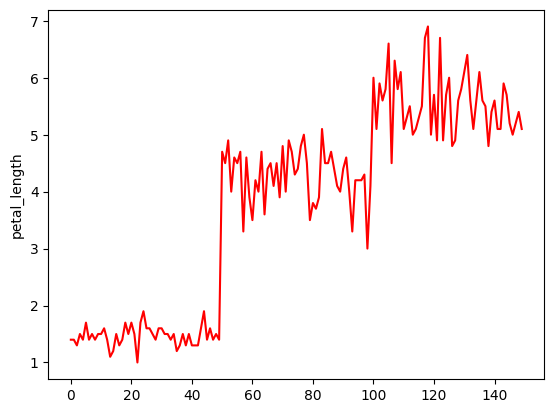

In [16]:
sns.lineplot(df['petal_length'],color='red')
plt.show()

In [17]:
fig1 = px.histogram(df, x="species", color="sepal_length")
fig1.show()

In [18]:
fig2 = px.histogram(df, x="species", color="petal_width")
fig2.show()

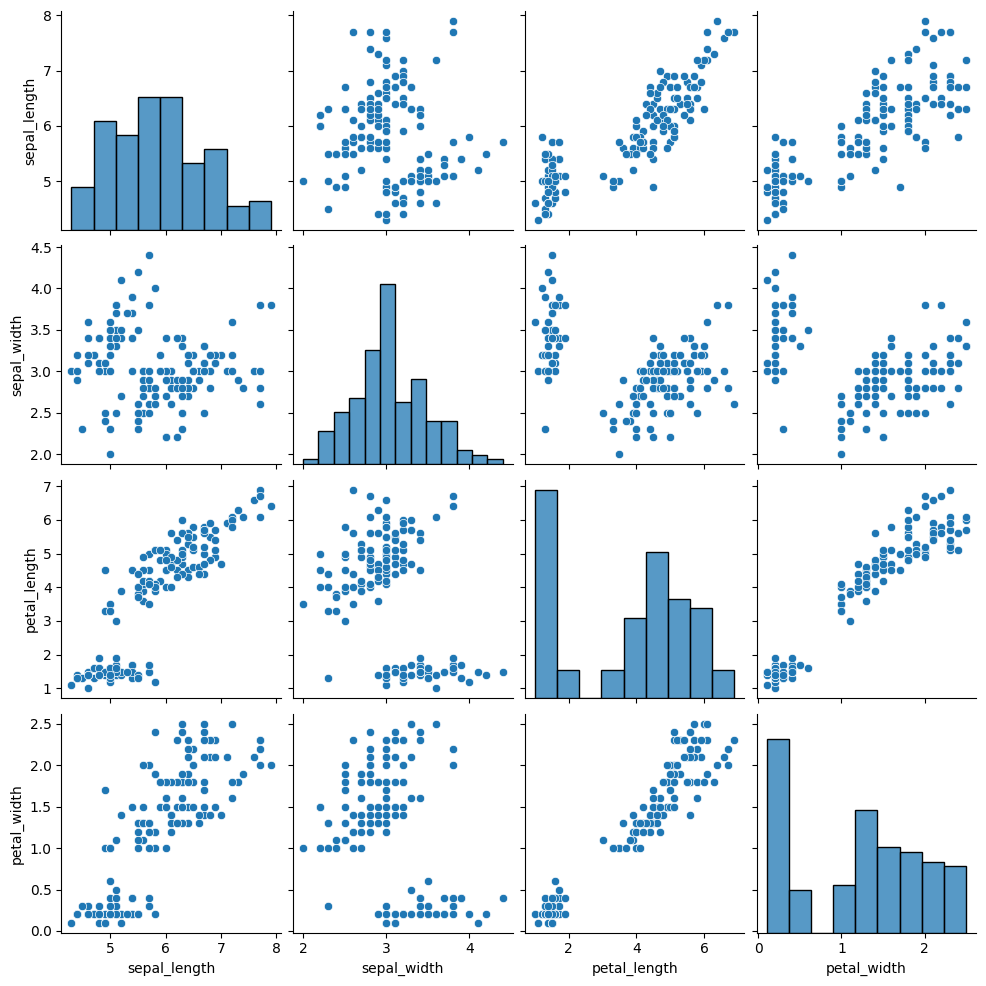

In [19]:
sns.pairplot(df)

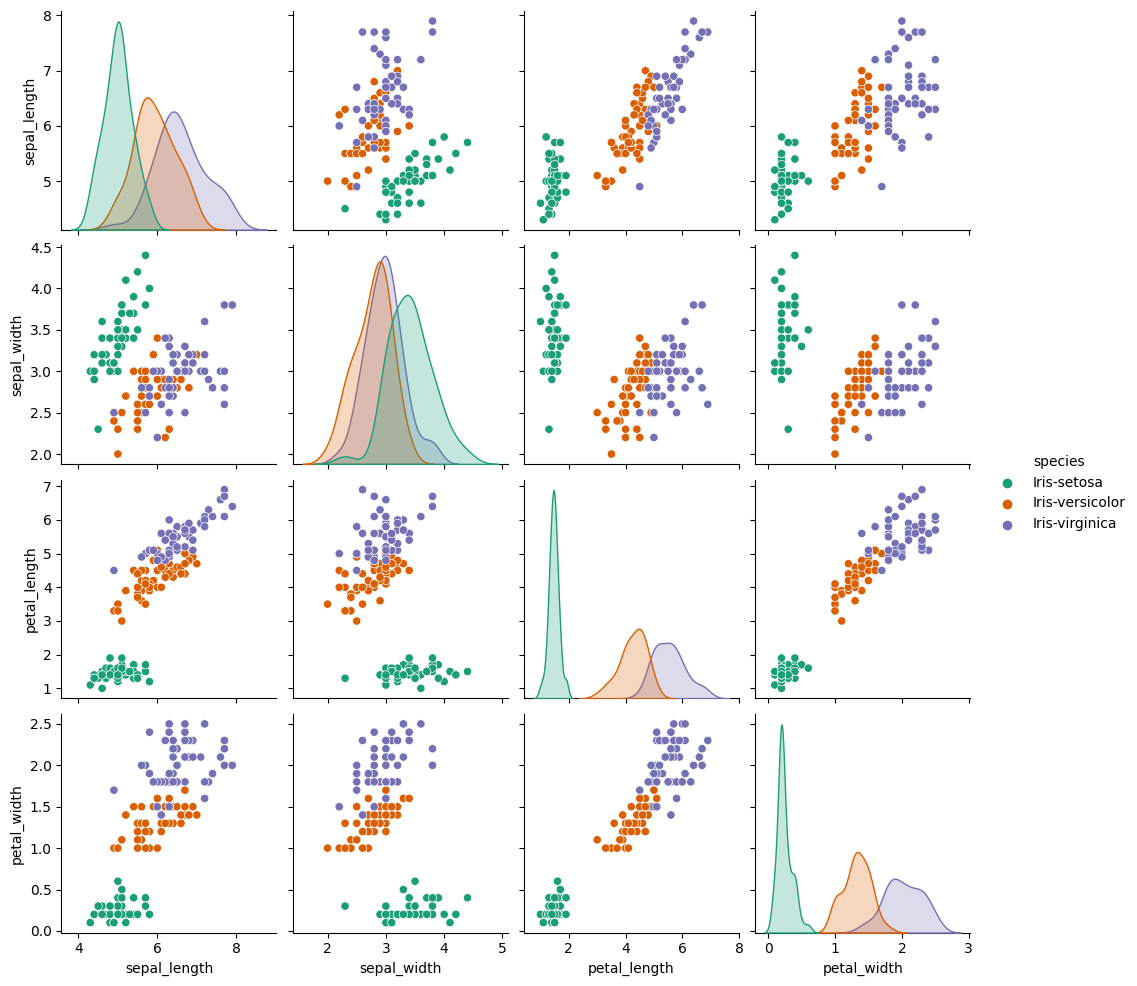

In [20]:
sns.pairplot(df,hue='species',palette='Dark2');

In [21]:
X = df.drop(['species'], axis=1)
y = df['species']

In [22]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
  y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [29]:
import sklearn.model_selection

In [30]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.2, random_state=32)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
acc_knn = model.score(X_test, y_test)*100
print("Accuracy (KNN): ",acc_knn)

Accuracy (KNN):  100.0


In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
acc_lr = model.score(X_test, y_test)*100
print("Accuracy: ",acc_lr)

Accuracy:  100.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Axes: xlabel='Accuracy', ylabel='Models'>

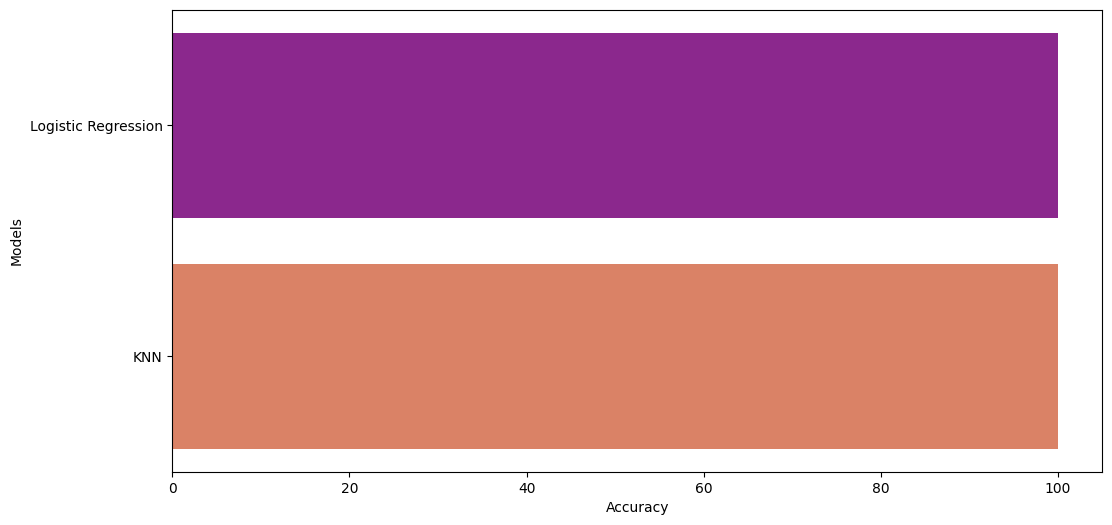

In [33]:
plt.figure(figsize=(12,6))
model_acc = [acc_lr,acc_knn]
model_name = ['Logistic Regression','KNN']
plt.xlabel("Accuracy")
plt.ylabel("Models")
sns.barplot(x=model_acc, y=model_name, palette='plasma')

**Conclusion** : 1)This project successfully developed a machine learning model capable of accurately classifying Iris flowers into their three distinct species (setosa, versicolor, and virginica) based solely on sepal and petal measurements.

2)The model leverages the well-defined structure and clear interspecies distinctions present within the widely used Iris dataset to effectively learn crucial classification patterns.

3)Demonstrating its potential for real-world applications, the model achieves high accuracy in identifying Iris species.

4)Beyond simple identification, this model opens doors to diverse applications such as assisting botanical research, identifying wild Iris specimens, and even automating flower sorting and inventory management in agricultural settings.

5)This successful initial implementation paves the way for further exploration and potential expansion to encompass the classification of a wider range of flower species and handle more complex data sets.